# ABEL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework and required classes

In [1]:
from abel import *
import numpy as np
import scipy.constants as SI
%load_ext autoreload
%autoreload 2

### Define electron linac (PWFA)

In [46]:
# define driver
driver_source = SourceBasic()
driver_source.charge = -2.7e10 * SI.e # [C]
driver_source.energy = 0.15e9 # [eV]
driver_source.rel_energy_spread = 0.01
driver_source.bunch_length = 42e-6 # [m]
driver_source.z_offset = 300e-6 # [m]
driver_source.emit_nx, driver_source.emit_ny = 10e-6, 10e-6 # [m rad]
driver_source.beta_x, driver_source.beta_y = 30e-3, 30e-3 # [m]
driver_source.num_particles = 5000
driver_source.wallplug_efficiency = 0.5

# define driver accelerator
driver_accel = RFAcceleratorBasic()
driver_accel.nom_energy_gain = 31.1e9 # [eV]
driver_accel.accel_gradient = 10e6 # [V/m]

# define driver complex
driver_complex = DriverComplexBasic()
driver_complex.source = driver_source
driver_complex.rf_accelerator = driver_accel

# define stage
stage = StageBasic()
stage.driver_source = driver_complex
stage.nom_accel_gradient = 6.4e9 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5

# define beam
esource = SourceBasic()
esource.charge = -1e10 * SI.e # [C]
esource.energy = 5e9 # [eV]
esource.rel_energy_spread = 0.01
esource.bunch_length = 18e-6 # [m]
esource.z_offset = -34e-6 # [m]
esource.emit_nx, esource.emit_ny = 160e-6, 0.56e-6 # [m rad]
esource.beta_x = stage.matched_beta_function(esource.energy)
esource.beta_y = esource.beta_x
esource.num_particles = 1000
esource.wallplug_efficiency = 0.1
esource.accel_gradient = 25e6 # [V/m]

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# define electron BDS
ebds = BeamDeliverySystemBasic()
ebds.beta_x, ebds.beta_y = 3.3e-3, 0.1e-3 # [m]
ebds.bunch_length = 0.75 * ebds.beta_y

# define electron linac
elinac = PlasmaLinac()
elinac.driver_complex = driver_complex
elinac.source = esource
elinac.stage = stage
elinac.interstage = interstage
elinac.bds = ebds
elinac.num_stages = 50

### Define the positron linac (RF)

In [47]:
# define positron source
psource = SourceBasic()
psource.charge = 4e10 * SI.e # [C]
psource.energy = 2.86e9 # [eV]
psource.rel_energy_spread = 0.0015
psource.bunch_length = 75e-6 # [m]
psource.emit_nx, psource.emit_ny = 10e-6, 0.035e-6 # [m rad]
psource.beta_x = 3.3e-3 # [m]
psource.beta_y = 0.1e-3 # [m]
psource.num_particles = esource.num_particles
psource.wallplug_efficiency = 0.5
psource.accel_gradient = 25e6 # [V/m]

# define RF accelerator
paccel = RFAcceleratorBasic()
paccel.accel_gradient = 25e6 # [V/m]

# define positron BDS
pbds = BeamDeliverySystemBasic()
pbds.beta_x = psource.beta_x
pbds.beta_y = psource.beta_y

# define positron linac
plinac = ConventionalLinac()
plinac.source = psource
plinac.rf_accelerator = paccel
plinac.bds = pbds

### Define the IP and collider

In [51]:
# define interaction point
ip = InteractionPointGuineaPig()

# define collider (with two different linacs)
collider = Collider()
collider.linac1 = elinac
collider.linac2 = plinac
collider.ip = ip
collider.com_energy = 550e9
collider.energy_asymmetry = 1
collider.bunch_separation = 100e-9 # [s]
collider.num_bunches_in_train = 100
collider.rep_rate_trains = 100 # [Hz]

### Perform collider tracking

In [52]:
# track particles
collider.run('collider_example', num_shots=3, overwrite=True);

>> SHOT 1/3
>> LINAC #1
>> SHOT 1/3
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 156.5/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 156.5/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 156.5/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 156.5/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 156.5/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 156.5/0.5 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 156.5/0.5 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 156.5/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 156.5/0.6 µm-rad)
Tracking element 10 (Stage

In [53]:
collider.print_cost()

-- COSTS ----------------------------------------
>> Construction costs:                 4.60 BILCU
   -- Linac #1:               1143 MILCU
   -- Linac #2:               3403 MILCU
   -- Interaction point:      50 MILCU
>> Overhead costs:                     2.39 BILCU
   -- Design/development:     460 MILCU
   -- Constrols/cabling:      689 MILCU
   -- Install/commission:     689 MILCU
   -- Management/inspection:  552 MILCU
>> Operating costs (2.3 TWh):          0.47 BILCU
>> Maintenance (460 FTEs, 138 yrs):      4.45 BILCU
>> Carbon tax (153 kton CO2e):         0.12 BILCU
   -- Construction (107 kton): 85 MILCU
   -- Operation (47 kton):   37 MILCU
-------------------------------------------------
>> Construction cost (EU accounting):  4.60 BILCU
>> Total project cost (US accounting): 6.99 BILCU
>> Full programme cost:                11.90 BILCU
>> Full programme cost (+ carbon tax): 12.03 BILCU
-------------------------------------------------


In [34]:
collider.print_emissions()

-- EMISSIONS ------------------------------------
>> Construction emissions (8.3 km): 53 kton CO2e
>> Operation emissions (0.2 TWh):   3 kton CO2e
-------------------------------------------------
>> Total emissions:                 56 kton CO2e
-------------------------------------------------


In [44]:
collider.optimize('collider_optimization', 
                    parameters=[{'name': 'energy_asymmetry', 'type': 'range', 'bounds': [1.0, 4.0], 'log_scale': True, 'value_type': 'float'}, 
                                {'name': 'linac1.num_stages', 'type': 'range', 'bounds': [5, 50], 'log_scale': True, 'value_type': 'int'}], 
                    merit_fcn=Collider.full_programme_cost,
                    label='Collider cost', 
                    num_shots_per_step=2,
                    num_steps=30, parallel=False, overwrite=True)

[INFO 06-02 15:04:46] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='energy_asymmetry', parameter_type=FLOAT, range=[1.0, 4.0], log_scale=True), RangeParameter(name='linac1.num_stages', parameter_type=INT, range=[5, 50], log_scale=True)], parameter_constraints=[]).
[INFO 06-02 15:04:46] ax.modelbridge.dispatch_utils: Using Models.BOTORCH_MODULAR since there is at least one ordered parameter and there are no unordered categorical parameters.
[INFO 06-02 15:04:46] ax.modelbridge.dispatch_utils: Calculating the number of remaining initialization trials based on num_initialization_trials=None max_initialization_trials=None num_tunable_parameters=2 num_trials=None use_batch_trials=False
[INFO 06-02 15:04:46] ax.modelbridge.dispatch_utils: calculated num_initialization_trials=5
[INFO 06-02 15:04:46] ax.modelbridge.dispatch_utils: num_completed_initialization_trials=0 num_remaining_initialization_trials=5
[INFO 06-02 15:04:46] ax.modelbridge

>> SHOT 1/60
>> LINAC #1
>> SHOT 1/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 150.4/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 214.3 m, 96.7 GeV, -1.60 nC, 0.1% rms, 150.4/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 229.2 m, 96.7 GeV, -1.60 nC, 0.1% rms, 150.4/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 243.5 m, 188.4 GeV, -1.60 nC, 0.0% rms, 150.4/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 264.3 m, 188.4 GeV, -1.60 nC, 0.0% rms, 150.4/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 278.6 m, 280.1 GeV, -1.60 nC, 0.0% rms, 150.4/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 304.0 m, 280.1 GeV, -1.60 nC, 0.0% rms, 150.4/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 318.3 m, 371.7 GeV, -1.60 nC, 0.0% rms, 150.4/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 347.5 m, 371.7 GeV, -1.60 nC, 0.0% rms, 150.4/0.6 µm-rad)
Tracking element 1

[INFO 06-02 15:04:48] ax.service.managed_loop: Running optimization trial 2...


>> EVENT 2-2: Luminosity (full/peak/geom.): 0.694 / 0.24 / 0.67 μb^-1
>> SHOT 3/60
>> LINAC #1
>> SHOT 3/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 160.2/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 208.8 m, 61.3 GeV, -1.60 nC, 0.1% rms, 160.3/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 220.6 m, 61.3 GeV, -1.60 nC, 0.1% rms, 160.3/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 229.4 m, 117.5 GeV, -1.60 nC, 0.0% rms, 160.3/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 245.8 m, 117.5 GeV, -1.60 nC, 0.0% rms, 160.4/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 254.6 m, 173.8 GeV, -1.60 nC, 0.0% rms, 160.4/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 274.6 m, 173.8 GeV, -1.60 nC, 0.0% rms, 160.4/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 283.4 m, 230.1 GeV, -1.60 nC, 0.0% rms, 160.4/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 306.4 

[INFO 06-02 15:04:50] ax.service.managed_loop: Running optimization trial 3...


>> EVENT 4-4: Luminosity (full/peak/geom.): 0.892 / 0.371 / 0.83 μb^-1
>> SHOT 5/60
>> LINAC #1
>> SHOT 5/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 153.6/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 203.7 m, 28.7 GeV, -1.60 nC, 0.2% rms, 153.8/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 211.8 m, 28.7 GeV, -1.60 nC, 0.2% rms, 153.8/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 215.5 m, 52.5 GeV, -1.60 nC, 0.1% rms, 153.9/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 226.5 m, 52.5 GeV, -1.60 nC, 0.1% rms, 153.9/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 230.2 m, 76.2 GeV, -1.60 nC, 0.1% rms, 153.9/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 243.4 m, 76.2 GeV, -1.60 nC, 0.1% rms, 153.9/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 247.1 m, 100.0 GeV, -1.60 nC, 0.0% rms, 153.9/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 262.3 m, 

[INFO 06-02 15:04:53] ax.service.managed_loop: Running optimization trial 4...


>> SHOT 7/60
>> LINAC #1
>> SHOT 7/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 168.2/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 202.1 m, 18.7 GeV, -1.60 nC, 0.3% rms, 168.6/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 208.7 m, 18.7 GeV, -1.60 nC, 0.3% rms, 168.6/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 210.8 m, 32.5 GeV, -1.60 nC, 0.2% rms, 168.7/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 219.5 m, 32.5 GeV, -1.60 nC, 0.2% rms, 168.7/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 221.6 m, 46.2 GeV, -1.60 nC, 0.1% rms, 168.7/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 231.9 m, 46.2 GeV, -1.60 nC, 0.1% rms, 168.7/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 234.1 m, 59.9 GeV, -1.60 nC, 0.1% rms, 168.7/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 245.8 m, 59.9 GeV, -1.60 nC, 0.1% rms, 168.7/0.6 µm-rad)
Tracking element 10 (Sta

[INFO 06-02 15:04:56] ax.service.managed_loop: Running optimization trial 5...


>> SHOT 9/60
>> LINAC #1
>> SHOT 9/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 163.6/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 202.2 m, 19.2 GeV, -1.60 nC, 0.3% rms, 163.4/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 208.8 m, 19.2 GeV, -1.60 nC, 0.3% rms, 163.4/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 211.1 m, 33.3 GeV, -1.60 nC, 0.1% rms, 163.2/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 219.8 m, 33.3 GeV, -1.60 nC, 0.1% rms, 163.2/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 222.0 m, 47.5 GeV, -1.60 nC, 0.1% rms, 163.2/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 232.4 m, 47.5 GeV, -1.60 nC, 0.1% rms, 163.2/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 234.7 m, 61.7 GeV, -1.60 nC, 0.1% rms, 163.1/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 246.5 m, 61.7 GeV, -1.60 nC, 0.1% rms, 163.1/0.6 µm-rad)
Tracking element 10 (Sta

[INFO 06-02 15:04:59] ax.service.managed_loop: Running optimization trial 6...


>> SHOT 11/60
>> LINAC #1
>> SHOT 11/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 154.1/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 202.6 m, 21.9 GeV, -1.60 nC, 0.2% rms, 154.0/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 209.7 m, 21.9 GeV, -1.60 nC, 0.2% rms, 154.0/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 212.4 m, 38.7 GeV, -1.60 nC, 0.1% rms, 153.9/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 221.8 m, 38.7 GeV, -1.60 nC, 0.1% rms, 153.9/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 224.4 m, 55.6 GeV, -1.60 nC, 0.1% rms, 153.8/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 235.7 m, 55.6 GeV, -1.60 nC, 0.1% rms, 153.8/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 238.3 m, 72.5 GeV, -1.60 nC, 0.1% rms, 153.8/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 251.2 m, 72.5 GeV, -1.60 nC, 0.1% rms, 153.8/0.6 µm-rad)
Tracking element 10 (S

[INFO 06-02 15:05:03] ax.service.managed_loop: Running optimization trial 7...


>> SHOT 13/60
>> LINAC #1
>> SHOT 13/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 156.7/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 156.8/0.5 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 156.8/0.5 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 156.8/0.5 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 156.8/0.5 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 156.7/0.5 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 156.7/0.5 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 156.7/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 156.7/0.6 µm-rad)
Tracking element 10 (S

[INFO 06-02 15:05:08] ax.service.managed_loop: Running optimization trial 8...


>> SHOT 15/60
>> LINAC #1
>> SHOT 15/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 160.2/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 203.4 m, 26.9 GeV, -1.60 nC, 0.2% rms, 160.7/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 211.3 m, 26.9 GeV, -1.60 nC, 0.2% rms, 160.7/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 214.7 m, 48.8 GeV, -1.60 nC, 0.1% rms, 160.7/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 225.3 m, 48.8 GeV, -1.60 nC, 0.1% rms, 160.7/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 228.7 m, 70.7 GeV, -1.60 nC, 0.1% rms, 160.7/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 241.4 m, 70.7 GeV, -1.60 nC, 0.1% rms, 160.7/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 244.8 m, 92.6 GeV, -1.60 nC, 0.1% rms, 160.7/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 259.4 m, 92.6 GeV, -1.60 nC, 0.1% rms, 160.7/0.6 µm-rad)
Tracking element 10 (S

[INFO 06-02 15:05:13] ax.service.managed_loop: Running optimization trial 9...


>> SHOT 17/60
>> LINAC #1
>> SHOT 17/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 160.3/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 201.2 m, 12.7 GeV, -1.60 nC, 0.4% rms, 160.3/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 206.6 m, 12.7 GeV, -1.60 nC, 0.4% rms, 160.3/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 207.8 m, 20.4 GeV, -1.60 nC, 0.2% rms, 160.3/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 214.7 m, 20.4 GeV, -1.60 nC, 0.2% rms, 160.3/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 215.9 m, 28.1 GeV, -1.60 nC, 0.2% rms, 160.4/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 223.9 m, 28.1 GeV, -1.60 nC, 0.2% rms, 160.4/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 225.1 m, 35.9 GeV, -1.60 nC, 0.1% rms, 160.4/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 234.2 m, 35.9 GeV, -1.60 nC, 0.1% rms, 160.4/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 235.4 m, 43.6 Ge

[INFO 06-02 15:05:18] ax.service.managed_loop: Running optimization trial 10...


>> SHOT 19/60
>> LINAC #1
>> SHOT 19/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 156.3/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 208.4 m, 59.0 GeV, -1.60 nC, 0.1% rms, 156.1/0.5 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 220.1 m, 59.0 GeV, -1.60 nC, 0.1% rms, 156.1/0.5 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 228.5 m, 113.0 GeV, -1.60 nC, 0.0% rms, 156.1/0.5 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 244.6 m, 113.0 GeV, -1.60 nC, 0.0% rms, 156.1/0.5 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 253.0 m, 167.0 GeV, -1.60 nC, 0.0% rms, 156.1/0.5 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 272.6 m, 167.0 GeV, -1.60 nC, 0.0% rms, 156.1/0.5 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 281.0 m, 221.0 GeV, -1.60 nC, 0.0% rms, 156.1/0.5 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 303.5 m, 221.0 GeV, -1.60 nC, 0.0% rms, 156.1/0.5 µm-rad)
Tracking element

[INFO 06-02 15:05:21] ax.service.managed_loop: Running optimization trial 11...


>> SHOT 21/60
>> LINAC #1
>> SHOT 21/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 170.5/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 201.4 m, 14.0 GeV, -1.60 nC, 0.3% rms, 170.6/0.5 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 207.1 m, 14.0 GeV, -1.60 nC, 0.3% rms, 170.6/0.5 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 208.5 m, 23.0 GeV, -1.60 nC, 0.2% rms, 170.7/0.5 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 215.7 m, 23.0 GeV, -1.60 nC, 0.2% rms, 170.7/0.5 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 217.1 m, 32.0 GeV, -1.60 nC, 0.2% rms, 170.7/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 225.7 m, 32.0 GeV, -1.60 nC, 0.2% rms, 170.7/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 227.1 m, 41.0 GeV, -1.60 nC, 0.1% rms, 170.7/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 236.8 m, 41.0 GeV, -1.60 nC, 0.1% rms, 170.7/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 238.2 m, 50.0 Ge

[INFO 06-02 15:05:26] ax.service.managed_loop: Running optimization trial 12...


>> SHOT 23/60
>> LINAC #1
>> SHOT 23/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 159.3/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 201.0 m, 11.4 GeV, -1.60 nC, 0.4% rms, 159.2/0.5 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 206.1 m, 11.4 GeV, -1.60 nC, 0.4% rms, 159.2/0.5 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 207.1 m, 17.9 GeV, -1.60 nC, 0.3% rms, 159.1/0.5 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 213.5 m, 17.9 GeV, -1.60 nC, 0.3% rms, 159.1/0.5 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 214.5 m, 24.3 GeV, -1.60 nC, 0.2% rms, 159.0/0.5 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 222.0 m, 24.3 GeV, -1.60 nC, 0.2% rms, 159.1/0.5 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 223.0 m, 30.7 GeV, -1.60 nC, 0.2% rms, 159.0/0.5 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 231.4 m, 30.7 GeV, -1.60 nC, 0.2% rms, 159.0/0.5 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 232.4 m, 37.1 Ge

[INFO 06-02 15:05:31] ax.service.managed_loop: Running optimization trial 13...


>> SHOT 25/60
>> LINAC #1
>> SHOT 25/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 160.5/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 160.4/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 160.3/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 160.2/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 160.2/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 160.1/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 160.1/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 160.1/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 160.1/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:05:37] ax.service.managed_loop: Running optimization trial 14...


>> SHOT 27/60
>> LINAC #1
>> SHOT 27/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 163.0/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 205.3 m, 38.8 GeV, -1.60 nC, 0.1% rms, 163.3/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 214.7 m, 38.8 GeV, -1.60 nC, 0.1% rms, 163.3/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 220.0 m, 72.5 GeV, -1.60 nC, 0.1% rms, 163.3/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 232.9 m, 72.5 GeV, -1.60 nC, 0.1% rms, 163.3/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 238.1 m, 106.3 GeV, -1.60 nC, 0.0% rms, 163.3/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 253.7 m, 106.3 GeV, -1.60 nC, 0.0% rms, 163.3/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 259.0 m, 140.0 GeV, -1.60 nC, 0.0% rms, 163.3/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 276.9 m, 140.0 GeV, -1.60 nC, 0.0% rms, 163.3/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 282.2 m, 173

[INFO 06-02 15:05:41] ax.service.managed_loop: Running optimization trial 15...


>> SHOT 29/60
>> LINAC #1
>> SHOT 29/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 155.1/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.9 m, 10.8 GeV, -1.60 nC, 0.5% rms, 155.0/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.9 m, 10.8 GeV, -1.60 nC, 0.5% rms, 155.0/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.8 m, 16.5 GeV, -1.60 nC, 0.3% rms, 155.0/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.9 m, 16.5 GeV, -1.60 nC, 0.3% rms, 155.0/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.8 m, 22.3 GeV, -1.60 nC, 0.2% rms, 155.0/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 221.0 m, 22.3 GeV, -1.60 nC, 0.2% rms, 155.0/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.9 m, 28.1 GeV, -1.60 nC, 0.2% rms, 155.0/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.9 m, 28.1 GeV, -1.60 nC, 0.2% rms, 155.0/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 230.8 m, 33.8 Ge

[INFO 06-02 15:05:46] ax.service.managed_loop: Running optimization trial 16...


>> SHOT 31/60
>> LINAC #1
>> SHOT 31/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 157.0/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 234.2 m, 224.0 GeV, -1.60 nC, 0.0% rms, 157.3/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 256.9 m, 224.0 GeV, -1.60 nC, 0.0% rms, 157.3/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 291.1 m, 443.0 GeV, -1.60 nC, 0.0% rms, 157.4/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 323.0 m, 443.0 GeV, -1.60 nC, 0.0% rms, 157.4/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 357.2 m, 662.0 GeV, -1.60 nC, 0.0% rms, 157.4/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 396.1 m, 662.0 GeV, -1.60 nC, 0.0% rms, 157.4/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 430.4 m, 881.0 GeV, -1.60 nC, 0.0% rms, 157.4/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 475.3 m, 881.0 GeV, -1.60 nC, 0.0% rms, 157.4/0.6 µm-rad)
Tracking eleme

/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 114.4 m, 2.9 GeV, 6.41 nC, 0.1% rms, 10.1/0.0 µm-rad)
Tracking element 2 (RFAcceleratorBasic, stage 0, s = 3042.8 m, 68.7 GeV, 6.41 nC, 0.0% rms, 10.1/0.0 µm-rad)
Tracking element 3 (BeamDeliverySystemBasic, stage 0, s = 3042.8 m, 68.7 GeV, 6.41 nC, 0.0% rms, 10.1/0.0 µm-rad)
>> INTERACTION POINT
>> EVENT 31-31: Luminosity (full/peak/geom.): 0.841 / 0.449 / 0.84 μb^-1
>> SHOT 32/60
>> LINAC #1
>> SHOT 32/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 164.4/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 234.2 m, 224.0 GeV, -1.60 nC, 0.0% rms, 164.2/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 256.9 m, 224.0 GeV, -1.60 nC, 0.0% rms, 164.2/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 291.1 m, 443.0 GeV, -1.60 nC, 0.0% rms, 164.2/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 323.0 m, 443.0 GeV, -1.60 nC, 0.0% rms, 164.2/0.6 µm-rad)
Tracking element 6 

[INFO 06-02 15:05:50] ax.service.managed_loop: Running optimization trial 17...


>> SHOT 33/60
>> LINAC #1
>> SHOT 33/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/botorch/optim/optimize.py:367: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 154.9/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 154.9/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 154.9/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 154.9/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 154.9/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 154.9/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 154.9/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 154.9/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 154.9/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:05:56] ax.service.managed_loop: Running optimization trial 18...


>> SHOT 35/60
>> LINAC #1
>> SHOT 35/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 160.4/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 160.4/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 160.4/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 160.4/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 160.4/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 160.4/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 160.4/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 160.4/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 160.3/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:02] ax.service.managed_loop: Running optimization trial 19...


>> SHOT 37/60
>> LINAC #1
>> SHOT 37/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 162.8/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 162.9/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 162.9/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 162.9/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 162.9/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 162.9/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 162.9/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 162.9/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 162.9/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:08] ax.service.managed_loop: Running optimization trial 20...


>> SHOT 39/60
>> LINAC #1
>> SHOT 39/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 167.4/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 167.5/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 167.6/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 167.6/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 167.5/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 167.5/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 167.5/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 167.5/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 167.5/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:14] ax.service.managed_loop: Running optimization trial 21...


>> SHOT 41/60
>> LINAC #1
>> SHOT 41/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 164.2/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 164.1/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 164.1/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 164.1/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 164.1/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 164.1/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 164.1/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 164.1/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 164.1/0.6 µm-rad)
Tracking element 10 (S

[INFO 06-02 15:06:20] ax.service.managed_loop: Running optimization trial 22...


>> SHOT 43/60
>> LINAC #1
>> SHOT 43/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 157.5/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 157.6/0.5 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 157.6/0.5 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 157.6/0.5 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 157.6/0.5 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 157.7/0.5 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 157.7/0.5 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 157.7/0.5 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 157.7/0.5 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:26] ax.service.managed_loop: Running optimization trial 23...


>> SHOT 45/60
>> LINAC #1
>> SHOT 45/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 165.3/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 165.6/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 165.5/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 165.5/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 165.6/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 165.6/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 165.6/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 165.6/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 165.6/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:33] ax.service.managed_loop: Running optimization trial 24...


>> SHOT 47/60
>> LINAC #1
>> SHOT 47/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.1% rms, 163.0/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 163.0/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 163.0/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 162.9/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 162.9/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 162.9/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 162.9/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 162.8/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 162.8/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:40] ax.service.managed_loop: Running optimization trial 25...


>> SHOT 49/60
>> LINAC #1
>> SHOT 49/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 149.0/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 149.1/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 149.0/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 149.0/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 149.0/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 148.9/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 149.0/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 148.9/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 148.9/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:47] ax.service.managed_loop: Running optimization trial 26...


>> SHOT 51/60
>> LINAC #1
>> SHOT 51/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 169.6/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 169.7/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 169.7/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 169.8/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 169.8/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 169.8/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 169.8/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 169.8/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 169.8/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:06:54] ax.service.managed_loop: Running optimization trial 27...


>> SHOT 53/60
>> LINAC #1
>> SHOT 53/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 163.9/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 164.0/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 164.0/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 164.0/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 164.0/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 164.1/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 164.0/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 164.1/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 164.1/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:07:01] ax.service.managed_loop: Running optimization trial 28...


>> SHOT 55/60
>> LINAC #1
>> SHOT 55/60
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 161.5/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 161.6/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 161.6/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 161.6/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 161.6/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 161.6/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 161.6/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 161.6/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 161.6/0.6 µm-rad)
Tracking element 10 (S

[INFO 06-02 15:07:08] ax.service.managed_loop: Running optimization trial 29...


>> SHOT 57/60
>> LINAC #1
>> SHOT 57/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 173.0/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 200.8 m, 10.4 GeV, -1.60 nC, 0.5% rms, 173.0/0.5 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 205.7 m, 10.4 GeV, -1.60 nC, 0.5% rms, 173.0/0.5 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 206.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 172.9/0.5 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 212.6 m, 15.8 GeV, -1.60 nC, 0.3% rms, 172.9/0.5 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 213.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 172.9/0.5 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 220.4 m, 21.2 GeV, -1.60 nC, 0.2% rms, 172.9/0.5 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 221.2 m, 26.6 GeV, -1.60 nC, 0.2% rms, 172.9/0.5 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 229.1 m, 26.6 GeV, -1.60 nC, 0.2% rms, 172.9/0.5 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 229.9 m, 32.0 Ge

[INFO 06-02 15:07:15] ax.service.managed_loop: Running optimization trial 30...


>> SHOT 59/60
>> LINAC #1
>> SHOT 59/60


/Users/carlal/UiO/Code/venvs/abel_venv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 170.0/0.5 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 202.2 m, 18.8 GeV, -1.60 nC, 0.3% rms, 169.8/0.5 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 208.7 m, 18.8 GeV, -1.60 nC, 0.3% rms, 169.8/0.5 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 210.9 m, 32.6 GeV, -1.60 nC, 0.2% rms, 169.8/0.5 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 219.5 m, 32.6 GeV, -1.60 nC, 0.2% rms, 169.8/0.5 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 221.7 m, 46.4 GeV, -1.60 nC, 0.1% rms, 169.9/0.5 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 232.0 m, 46.4 GeV, -1.60 nC, 0.1% rms, 169.9/0.5 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 234.1 m, 60.2 GeV, -1.60 nC, 0.1% rms, 169.9/0.5 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 245.9 m, 60.2 GeV, -1.60 nC, 0.1% rms, 169.9/0.5 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 248.0 m, 74.0 Ge

({'energy_asymmetry': 1.0, 'linac1.num_stages': 50},
 ({'objective': 513358585.3473016},
  {'objective': {'objective': 4918644949413.543}}))

### Plot the wakefield structure

In [54]:
# plot wakefield
elinac.stage.plot_wake()

No wake calculated


### Plot the beam evolution in the linac

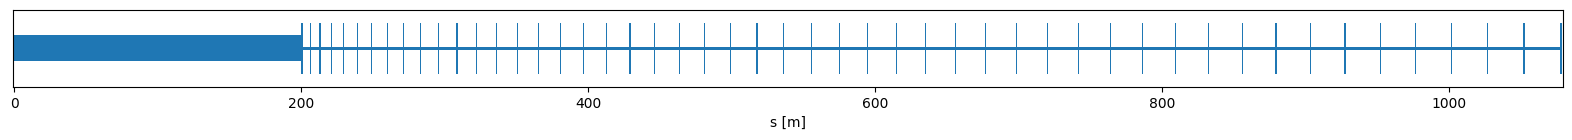

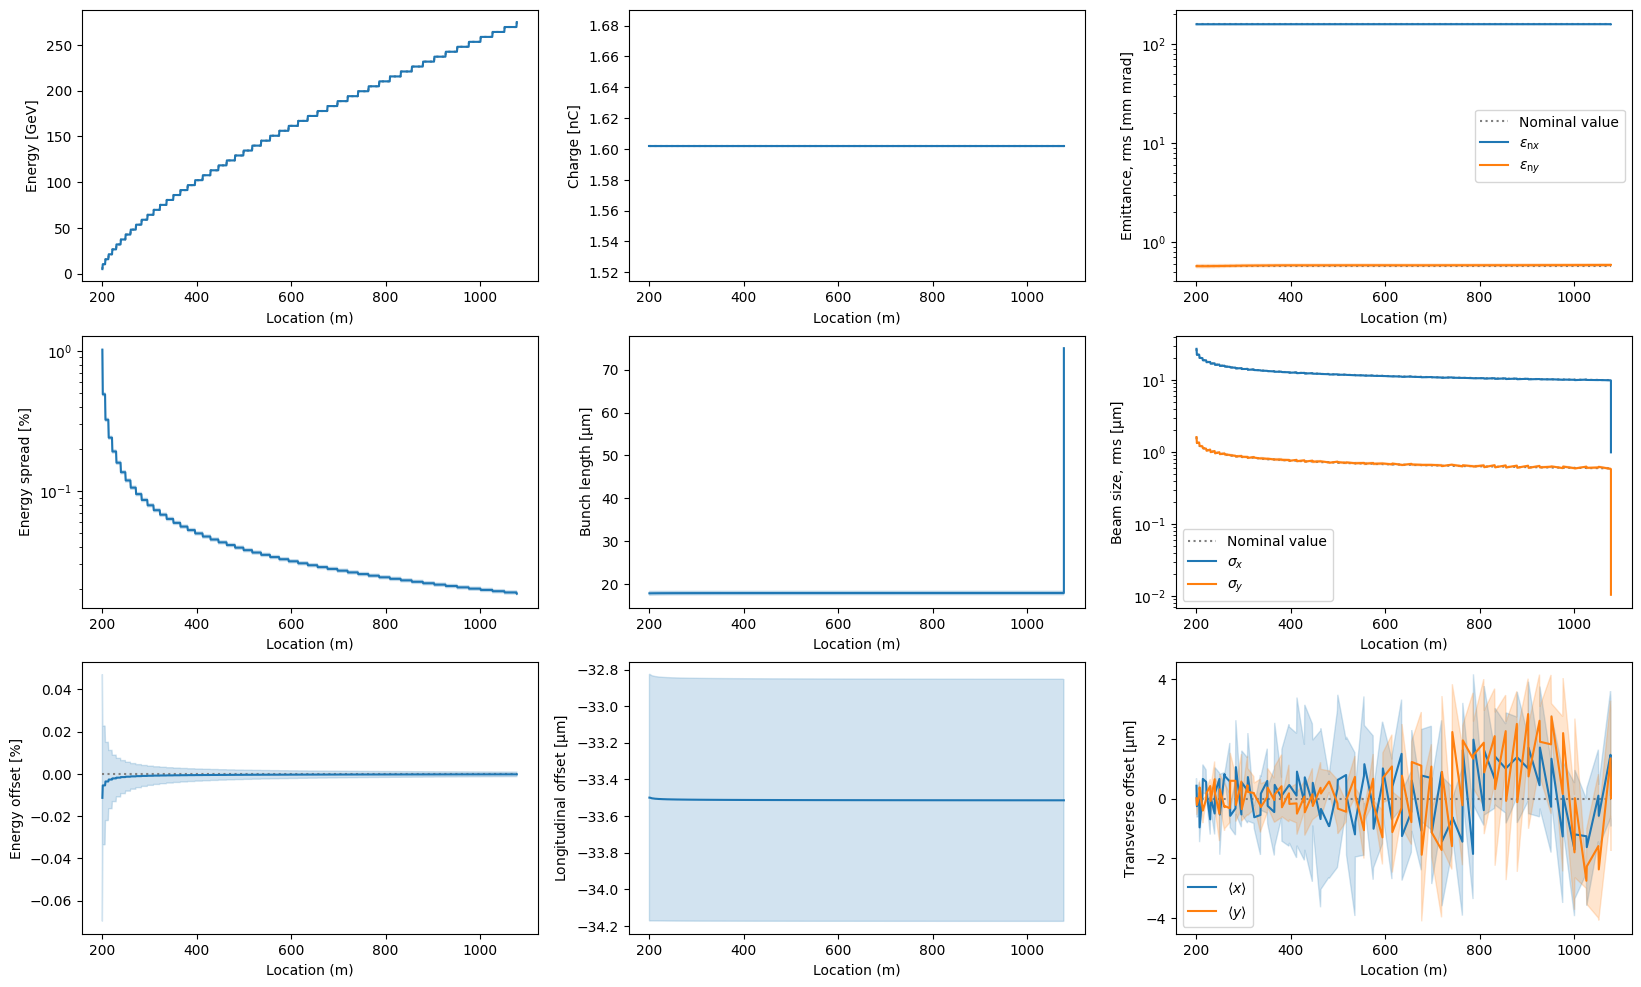

In [55]:
# plot beam evolution and linac survey
elinac.plot_survey()
elinac.plot_evolution(use_stage_nums=False)

In [ ]:
elinac.plot_waterfalls()

### Plot the collider luminosity

In [ ]:
# plot luminosity
collider.plot_luminosity()

# plot luminosity per power
collider.plot_luminosity_per_power()